![example](images/director_shot.jpeg)

# Microsoft Movie Studios Analysis

**Authors:** Dermot O'Brien, Ziyuan Wang
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

conn = sqlite3.connect('./zippedData/im.db')

In [2]:
ls zippedData

 Volume in drive C is Windows
 Volume Serial Number is 0CB4-0C01

 Directory of C:\Users\Terry\documents\flatiron\Project1\Microsoft-Movie-Studios-Project\zippedData

10/03/2022  02:46 PM    <DIR>          .
10/04/2022  12:03 PM    <DIR>          ..
10/03/2022  10:15 AM            53,544 bom.movie_gross.csv.gz
12/20/2021  04:31 PM       169,443,328 im.db
10/03/2022  10:15 AM           498,202 rt.movie_info.tsv.gz
10/03/2022  10:15 AM         3,402,194 rt.reviews.tsv.gz
10/03/2022  10:15 AM           827,840 tmdb.movies.csv.gz
10/03/2022  10:15 AM           153,218 tn.movie_budgets.csv.gz
               6 File(s)    174,378,326 bytes
               2 Dir(s)  414,628,851,712 bytes free


In [49]:
# Here you run your code to explore the data

tn_movies_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')

In [50]:
tn_movies_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [51]:
type(tn_movies_df['production_budget'][0])

str

In [59]:
tn_movies_df['production_budget'] = tn_movies_df['production_budget'].str.strip('$')

In [63]:
tn_movies_df['production_budget'] = tn_movies_df['production_budget'].str.replace(',','')

In [65]:
tn_movies_df['production_budget'] = tn_movies_df['production_budget'].astype(int)

In [66]:
tn_movies_df['domestic_gross'] = tn_movies_df['domestic_gross'].str.strip('$')

In [67]:
tn_movies_df['domestic_gross'] = tn_movies_df['domestic_gross'].str.replace(',','')

In [68]:
tn_movies_df['domestic_gross'] = tn_movies_df['domestic_gross'].astype(int)

In [69]:
tn_movies_df['worldwide_gross'] = tn_movies_df['worldwide_gross'].str.strip('$')

In [70]:
tn_movies_df['worldwide_gross'] = tn_movies_df['worldwide_gross'].str.replace(',','')

In [203]:
tn_movies_df['worldwide_gross'] = tn_movies_df['worldwide_gross'].astype('int64')

In [204]:
tn_movies_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [205]:
tn1 = tn_movies_df.copy()

In [206]:
type(tn1)

pandas.core.frame.DataFrame

In [207]:
tn1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [5]:
tmdb_moives_df = pd.read_csv('./zippedData/tmdb.movies.csv.gz')

In [6]:
tmdb_moives_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [7]:
tmdn_genreid = {28:"Action",
                12:"Adventure",
                16:"Animation",
                35:"Comedy",
                80:"Crime",
                99: "Documentary",
                18: "Drama",
                10751: "Family",
                14: "Fantasy",
                36: "History",
                27: "Horror",
                10402: "Music",
                9648:"Mystery",
                10749: "Romance",
                878: "Science Fiction",
                10770: "TV Movie",
                53: "Thriller",
                10752: "War",
                37: "Western"}

In [10]:
tmdb_moives_df = tmdb_moives_df.loc[tmdb_moives_df['genre_ids'] != '[]']

In [11]:
tmdb_moives_df['genre1'] = tmdb_moives_df['genre_ids'].str.split(",").str[0]

In [12]:
tmdb_moives_df['genre1'] = tmdb_moives_df['genre1'].str.strip('[')

In [13]:
tmdb_moives_df['genre1'] = tmdb_moives_df['genre1'].str.strip(']')

In [14]:
tmdb_moives_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre1
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,12
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,14
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,12
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,16
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,28
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,27
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,18
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,14
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,10751


In [15]:
tmdb_moives_df['genre1'] = tmdb_moives_df['genre1'].astype(int)

In [113]:
tmdb_moives_df['genre1_name'] = tmdb_moives_df['genre1'].map(tmdn_genreid)

tmdb_moives_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre1,genre1_name,genre_name
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,12,Adventure,Adventure
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,14,Fantasy,Fantasy
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,12,Adventure,Adventure
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,16,Animation,Animation
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,28,Action,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,27,Horror,Horror
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,18,Drama,Drama
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,14,Fantasy,Fantasy
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,10751,Family,Family


In [114]:
tmdb_moives1_df = tmdb_moives_df.copy()

In [115]:
tmdb_moives1_df = tmdb_moives1_df.loc[(tmdb_moives1_df['vote_count'] >= 5000) & (tmdb_moives1_df['vote_average'] != 0.0)]

In [116]:
df = tmdb_moives1_df[['original_title', 'genre1_name', 'vote_average','vote_count']]

In [118]:
df

,original_title,genre1_name,vote_average,vote_count
0,Harry Potter and the Deathly Hallows: Part 1,Adventure,7.7,10788
1,How to Train Your Dragon,Fantasy,7.7,7610
2,Iron Man 2,Adventure,6.8,12368
3,Toy Story,Animation,7.9,10174
4,Inception,Action,8.3,22186
...,...,...,...,...
23885,The Greatest Showman,Drama,8.0,5197
23897,Jumanji: Welcome to the Jungle,Action,6.7,7213
23922,"Three Billboards Outside Ebbing, Missouri",Crime,8.2,5432
23964,Murder on the Orient Express,Crime,6.7,5406


In [119]:
rate_for_each_genre = df.groupby('genre1_name')['vote_average'].mean()
rate_for_each_genre

genre1_name
Action             6.946341
Adventure          7.151852
Animation          7.605882
Comedy             7.057143
Crime              7.536364
Drama              7.607317
Family             7.250000
Fantasy            7.280000
History            8.100000
Horror             7.275000
Mystery            7.700000
Romance            7.775000
Science Fiction    7.015385
Thriller           7.175000
War                7.400000
Western            7.400000
Name: vote_average, dtype: float64

In [120]:
rate_for_each_genre.sort_values(ascending=False)

genre1_name
History            8.100000
Romance            7.775000
Mystery            7.700000
Drama              7.607317
Animation          7.605882
Crime              7.536364
Western            7.400000
War                7.400000
Fantasy            7.280000
Horror             7.275000
Family             7.250000
Thriller           7.175000
Adventure          7.151852
Comedy             7.057143
Science Fiction    7.015385
Action             6.946341
Name: vote_average, dtype: float64

Text(0, 0.5, 'Average ratings')

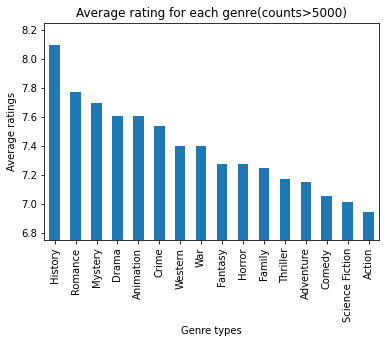

In [130]:
rate_for_each_genre.sort_values(ascending=False).plot(kind = 'bar', title = 'Average rating for each genre(counts>5000)', ylim=(6.75, 8.25))


plt.xlabel("Genre types")
plt.ylabel("Average ratings")


In [141]:
tmdb_moives2_df = tmdb_moives_df.copy()

In [142]:
tmdb_moives2_df = tmdb_moives2_df.loc[(tmdb_moives2_df['vote_count'] >= 2000) & (tmdb_moives2_df['vote_average'] != 0.0)]
tmdb_moives2_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre1,genre1_name,genre_name
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,12,Adventure,Adventure
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,14,Fantasy,Fantasy
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,12,Adventure,Adventure
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,16,Animation,Animation
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,28,Action,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23973,23973,[18],389015,en,"I, Tonya",15.407,2017-12-08,"I, Tonya",7.5,2904,18,Drama,Drama
23975,23975,"[18, 36]",399404,en,Darkest Hour,15.331,2017-11-22,Darkest Hour,7.3,2715,18,Drama,Drama
23999,23999,"[53, 27]",460019,en,Truth or Dare,14.354,2018-04-13,Truth or Dare,6.0,2005,53,Thriller,Thriller
24005,24005,"[27, 53]",346364,en,It,13.966,2017-09-08,It,7.2,10931,27,Horror,Horror


In [143]:
rate_for_each_genre1 = tmdb_moives2_df.groupby('genre1_name')['vote_average'].mean()
rate_for_each_genre1

genre1_name
Action             6.554737
Adventure          6.694030
Animation          7.167742
Comedy             6.685484
Crime              7.128000
Drama              7.260150
Family             7.137500
Fantasy            6.422727
History            7.350000
Horror             6.508571
Mystery            6.766667
Romance            7.485714
Science Fiction    6.637931
Thriller           6.710000
War                7.100000
Western            7.400000
Name: vote_average, dtype: float64

In [144]:
rate_for_each_genre1.sort_values(ascending=False)

genre1_name
Romance            7.485714
Western            7.400000
History            7.350000
Drama              7.260150
Animation          7.167742
Family             7.137500
Crime              7.128000
War                7.100000
Mystery            6.766667
Thriller           6.710000
Adventure          6.694030
Comedy             6.685484
Science Fiction    6.637931
Action             6.554737
Horror             6.508571
Fantasy            6.422727
Name: vote_average, dtype: float64

Text(0, 0.5, 'Average ratings')

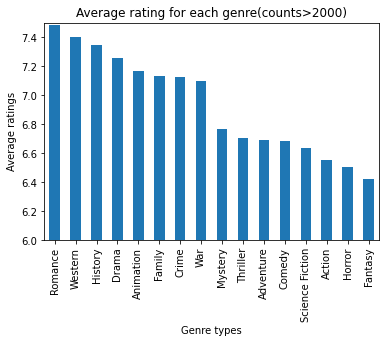

In [145]:
rate_for_each_genre1.sort_values(ascending=False).plot(kind = 'bar', title = 'Average rating for each genre(counts>2000)', ylim=(6, 7.5))


plt.xlabel("Genre types")
plt.ylabel("Average ratings")


In [146]:
tmdb_moives3_df = tmdb_moives_df.copy()

In [147]:
tmdb_moives3_df = tmdb_moives3_df.loc[(tmdb_moives3_df['vote_count'] >= 1000) & (tmdb_moives3_df['vote_average'] != 0.0)]
tmdb_moives3_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre1,genre1_name,genre_name
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,12,Adventure,Adventure
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,14,Fantasy,Fantasy
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,12,Adventure,Adventure
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,16,Animation,Animation
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,28,Action,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24112,24112,"[53, 18, 80, 9648]",446791,en,All the Money in the World,10.941,2017-12-25,All the Money in the World,6.4,1200,53,Thriller,Thriller
24128,24128,"[35, 18, 878]",301337,en,Downsizing,10.682,2017-12-22,Downsizing,5.1,1887,35,Comedy,Comedy
24169,24169,"[16, 18, 9648]",339877,en,Loving Vincent,10.025,2017-09-22,Loving Vincent,8.2,1200,16,Animation,Animation
24231,24231,[18],538362,it,Sulla mia pelle,9.161,2018-09-12,On My Skin,8.2,1078,18,Drama,Drama


In [148]:
rate_for_each_genre2 = tmdb_moives3_df.groupby('genre1_name')['vote_average'].mean()
rate_for_each_genre2

genre1_name
Action             6.496000
Adventure          6.568817
Animation          7.055769
Comedy             6.537013
Crime              6.872917
Drama              7.067949
Family             7.070000
Fantasy            6.430303
History            7.380000
Horror             6.242857
Music              7.250000
Mystery            6.773333
Romance            7.075000
Science Fiction    6.632432
TV Movie           6.800000
Thriller           6.536508
War                6.785714
Western            7.400000
Name: vote_average, dtype: float64

In [149]:
rate_for_each_genre2.sort_values(ascending=False)

genre1_name
Western            7.400000
History            7.380000
Music              7.250000
Romance            7.075000
Family             7.070000
Drama              7.067949
Animation          7.055769
Crime              6.872917
TV Movie           6.800000
War                6.785714
Mystery            6.773333
Science Fiction    6.632432
Adventure          6.568817
Comedy             6.537013
Thriller           6.536508
Action             6.496000
Fantasy            6.430303
Horror             6.242857
Name: vote_average, dtype: float64

Text(0, 0.5, 'Average ratings')

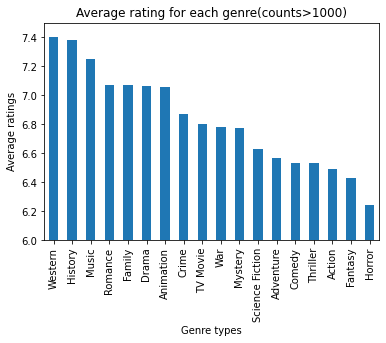

In [150]:
rate_for_each_genre2.sort_values(ascending=False).plot(kind = 'bar', title = 'Average rating for each genre(counts>1000)', ylim=(6, 7.5))


plt.xlabel("Genre types")
plt.ylabel("Average ratings")


In [208]:
im_df = pd.read_sql("""
SELECT *
FROM movie_basics


""", conn)
im_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [209]:
 im_df['genres'].str.split(",").str[3].isna().sum()

146144

In [210]:
type(im_df['genres'][0])

str

In [211]:
im1_df = pd.read_sql("""
SELECT 
       movie_id AS movie_id,
       original_title AS original_title,
       runtime_minutes AS runtime_minutes,
       genres AS genres
FROM movie_basics


""", conn)
im1_df

,movie_id,original_title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,Ashad Ka Ek Din,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,122.0,Drama
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama"
4,tt0100275,La Telenovela Errante,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,NaN,Documentary
146141,tt9916706,Dankyavar Danka,NaN,Comedy
146142,tt9916730,6 Gunn,116.0,None


In [212]:
im2_df = pd.read_sql("""
SELECT *
FROM movie_ratings


""", conn)
im2_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [325]:
Merged_df = tn1.merge(im1_df,
          left_on='movie',
          right_on='original_title',
          how='inner')

In [326]:
Merged_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,original_title,runtime_minutes,genres
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy"
1,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi"
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi"
4,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...
3532,68,"Jul 6, 2001",Cure,10000,94596,94596,tt5936960,Cure,NaN,None
3533,70,"Apr 1, 1996",Bang,10000,527,527,tt6616538,Bang,NaN,None
3534,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,tt1880418,Newlyweds,95.0,"Comedy,Drama"
3535,78,"Dec 31, 2018",Red 11,7000,0,0,tt7837402,Red 11,77.0,"Horror,Sci-Fi,Thriller"


In [327]:
TB_IM_Merged = Merged_df.merge(im2_df,
          left_on='movie_id',
          right_on='movie_id',
          how='inner')

In [328]:
TB_IM_Merged

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624
1,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",6.0,24451
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926
4,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135
...,...,...,...,...,...,...,...,...,...,...,...,...
2633,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,tt3973612,Stories of Our Lives,60.0,Drama,7.5,85
2634,68,"Jul 6, 2001",Cure,10000,94596,94596,tt1872026,Cure,93.0,Drama,4.9,11
2635,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,tt1880418,Newlyweds,95.0,"Comedy,Drama",6.4,1436
2636,78,"Dec 31, 2018",Red 11,7000,0,0,tt7837402,Red 11,77.0,"Horror,Sci-Fi,Thriller",5.6,43


In [329]:
TB_IM1 = TB_IM_Merged[['movie', 'production_budget', 'domestic_gross','worldwide_gross','genres','averagerating','numvotes']]

In [330]:
TB_IM1

,movie,production_budget,domestic_gross,worldwide_gross,genres,averagerating,numvotes
0,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy",6.6,447624
1,Dark Phoenix,350000000,42762350,149762350,"Action,Adventure,Sci-Fi",6.0,24451
2,Avengers: Age of Ultron,330600000,459005868,1403013963,"Action,Adventure,Sci-Fi",7.3,665594
3,Avengers: Infinity War,300000000,678815482,2048134200,"Action,Adventure,Sci-Fi",8.5,670926
4,Justice League,300000000,229024295,655945209,"Action,Adventure,Fantasy",6.5,329135
...,...,...,...,...,...,...,...
2633,Stories of Our Lives,15000,0,0,Drama,7.5,85
2634,Cure,10000,94596,94596,Drama,4.9,11
2635,Newlyweds,9000,4584,4584,"Comedy,Drama",6.4,1436
2636,Red 11,7000,0,0,"Horror,Sci-Fi,Thriller",5.6,43


In [331]:
TB_IM1['production_budget(million)'] = TB_IM1['production_budget']/ 1000000

<ipython-input-331-cfd1afe101d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TB_IM1['production_budget(million)'] = TB_IM1['production_budget']/ 1000000


In [332]:
TB_IM1['domestic_gross(million)'] = TB_IM1['domestic_gross']/ 1000000

<ipython-input-332-08f50fd1a1ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TB_IM1['domestic_gross(million)'] = TB_IM1['domestic_gross']/ 1000000


In [333]:
TB_IM1['worldwide_gross(million)'] = TB_IM1['worldwide_gross']/ 1000000

<ipython-input-333-b3afed287230>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TB_IM1['worldwide_gross(million)'] = TB_IM1['worldwide_gross']/ 1000000


In [334]:
TB_IM1['profit(million)'] = TB_IM1['worldwide_gross(million)'] + TB_IM1['domestic_gross(million)'] - TB_IM1['production_budget(million)']

<ipython-input-334-eddd17871eb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TB_IM1['profit(million)'] = TB_IM1['worldwide_gross(million)'] + TB_IM1['domestic_gross(million)'] - TB_IM1['production_budget(million)']


In [335]:
TB_IM1['genre1'] = TB_IM1['genres'].str.split(",").str[0]

In [351]:
TB_IM2 = TB_IM1.loc[(TB_IM1['averagerating'] > 6) & (TB_IM1['numvotes'] > 10000) & (TB_IM1['profit(million)'] > 400)&(TB_IM1['production_budget(million)'] > 10)]
TB_IM2

,movie,production_budget,domestic_gross,worldwide_gross,genres,averagerating,numvotes,production_budget(million),domestic_gross(million),worldwide_gross(million),profit(million),genre1
0,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy",6.6,447624,410.6,241.063875,1045.663875,876.127750,Action
2,Avengers: Age of Ultron,330600000,459005868,1403013963,"Action,Adventure,Sci-Fi",7.3,665594,330.6,459.005868,1403.013963,1531.419831,Action
3,Avengers: Infinity War,300000000,678815482,2048134200,"Action,Adventure,Sci-Fi",8.5,670926,300.0,678.815482,2048.134200,2426.949682,Action
4,Justice League,300000000,229024295,655945209,"Action,Adventure,Fantasy",6.5,329135,300.0,229.024295,655.945209,584.969504,Action
5,Spectre,300000000,200074175,879620923,"Action,Adventure,Thriller",6.8,352504,300.0,200.074175,879.620923,779.695098,Action
...,...,...,...,...,...,...,...,...,...,...,...,...
1186,Wonder,20000000,132422809,304604712,"Drama,Family",8.0,111632,20.0,132.422809,304.604712,417.027521,Drama
1298,Neighbors,18000000,150086800,270944428,Comedy,6.3,266020,18.0,150.086800,270.944428,403.031228,Comedy
1363,A Quiet Place,17000000,188024361,334522294,"Drama,Horror,Sci-Fi",7.6,305031,17.0,188.024361,334.522294,505.546655,Drama
1514,Black Swan,13000000,106954678,331266710,"Drama,Thriller",8.0,648854,13.0,106.954678,331.266710,425.221388,Drama


In [352]:
TB_IM_Final = TB_IM2[['movie', 'genre1','production_budget(million)','domestic_gross(million)','worldwide_gross(million)','profit(million)','averagerating','numvotes']]

In [353]:
TB_IM_Final

,movie,genre1,production_budget(million),domestic_gross(million),worldwide_gross(million),profit(million),averagerating,numvotes
0,Pirates of the Caribbean: On Stranger Tides,Action,410.6,241.063875,1045.663875,876.127750,6.6,447624
2,Avengers: Age of Ultron,Action,330.6,459.005868,1403.013963,1531.419831,7.3,665594
3,Avengers: Infinity War,Action,300.0,678.815482,2048.134200,2426.949682,8.5,670926
4,Justice League,Action,300.0,229.024295,655.945209,584.969504,6.5,329135
5,Spectre,Action,300.0,200.074175,879.620923,779.695098,6.8,352504
...,...,...,...,...,...,...,...,...
1186,Wonder,Drama,20.0,132.422809,304.604712,417.027521,8.0,111632
1298,Neighbors,Comedy,18.0,150.086800,270.944428,403.031228,6.3,266020
1363,A Quiet Place,Drama,17.0,188.024361,334.522294,505.546655,7.6,305031
1514,Black Swan,Drama,13.0,106.954678,331.266710,425.221388,8.0,648854


In [361]:
TB_IM3 = TB_IM1.loc[(TB_IM1['averagerating'] > 6) & (TB_IM1['numvotes'] > 10000) & (TB_IM1['production_budget(million)'] > 10)]
TB_IM3

,movie,production_budget,domestic_gross,worldwide_gross,genres,averagerating,numvotes,production_budget(million),domestic_gross(million),worldwide_gross(million),profit(million),genre1
0,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy",6.6,447624,410.6,241.063875,1045.663875,876.127750,Action
2,Avengers: Age of Ultron,330600000,459005868,1403013963,"Action,Adventure,Sci-Fi",7.3,665594,330.6,459.005868,1403.013963,1531.419831,Action
3,Avengers: Infinity War,300000000,678815482,2048134200,"Action,Adventure,Sci-Fi",8.5,670926,300.0,678.815482,2048.134200,2426.949682,Action
4,Justice League,300000000,229024295,655945209,"Action,Adventure,Fantasy",6.5,329135,300.0,229.024295,655.945209,584.969504,Action
5,Spectre,300000000,200074175,879620923,"Action,Adventure,Thriller",6.8,352504,300.0,200.074175,879.620923,779.695098,Action
...,...,...,...,...,...,...,...,...,...,...,...,...
1603,Woman in Gold,11000000,33307793,58586407,"Biography,Drama,History",7.3,48501,11.0,33.307793,58.586407,80.894200,Biography
1604,"I, Tonya",11000000,30014534,53797409,"Biography,Comedy,Drama",7.5,141668,11.0,30.014534,53.797409,72.811943,Biography
1605,Quartet,11000000,18388357,56178935,"Comedy,Drama",6.8,17979,11.0,18.388357,56.178935,63.567292,Comedy
1606,Inside Llewyn Davis,11000000,13248209,32943247,"Drama,Music",7.5,123759,11.0,13.248209,32.943247,35.191456,Drama


Text(0.5, 1.0, 'Relationship Between Ratings and Budget(10million<Budget<100million)')

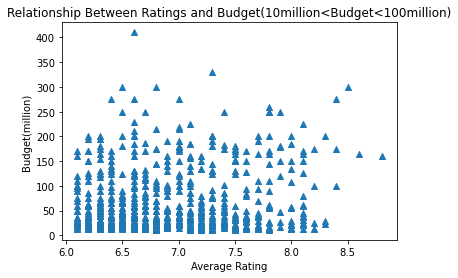

In [362]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(x=TB_IM3['averagerating'], y=TB_IM3['production_budget(million)'],
           marker='^')

ax.set_xlabel('Average Rating')
ax.set_ylabel('Budget(million)')
ax.set_title('Relationship Between Ratings and Budget(10million<Budget<100million)')

Text(0.5, 1.0, 'Relationship Between Ratings and Profit(Profit>400million)')

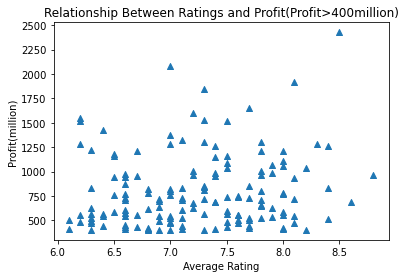

In [363]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(x=TB_IM_Final['averagerating'], y=TB_IM_Final['profit(million)'],
           marker='^')

ax.set_xlabel('Average Rating')
ax.set_ylabel('Profit(million)')
ax.set_title('Relationship Between Ratings and Profit(Profit>400million)')

In [365]:
budget_for_each_genre = TB_IM3.groupby('genre1')['production_budget(million)'].mean()
budget_for_each_genre.sort_values(ascending=False)

genre1
Adventure    103.165000
Action        95.673897
Family        90.000000
Animation     58.285714
Mystery       52.333333
Romance       50.200000
Horror        36.214286
Drama         32.947059
Comedy        32.346667
Crime         32.146667
Biography     30.373077
Sci-Fi        25.000000
Fantasy       18.500000
Music         18.000000
Name: production_budget(million), dtype: float64

Text(0, 0.5, 'Average profit(million)')

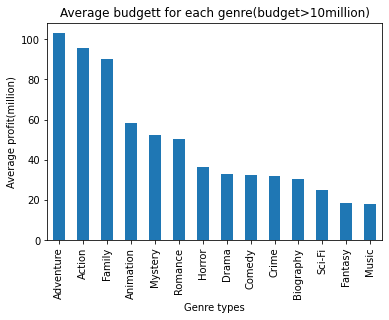

In [366]:
budget_for_each_genre.sort_values(ascending=False).plot(kind = 'bar', title = 'Average budgett for each genre(budget>10million)')


plt.xlabel("Genre types")
plt.ylabel("Average profit(million)")

In [358]:
profit_for_each_genre = TB_IM_Final.groupby('genre1')['profit(million)'].mean()
profit_for_each_genre

genre1
Action        829.657800
Adventure     859.972824
Animation     639.195415
Biography     646.688504
Comedy        552.560102
Drama         531.802121
Family       1283.851135
Horror        611.519080
Name: profit(million), dtype: float64

In [359]:
profit_for_each_genre.sort_values(ascending=False)

genre1
Family       1283.851135
Adventure     859.972824
Action        829.657800
Biography     646.688504
Animation     639.195415
Horror        611.519080
Comedy        552.560102
Drama         531.802121
Name: profit(million), dtype: float64

Text(0, 0.5, 'Average profit(million)')

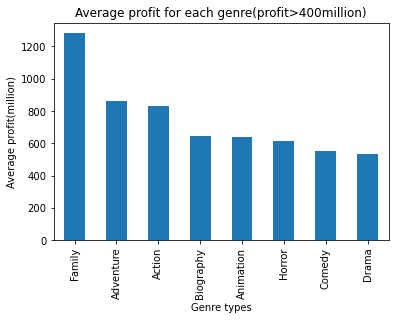

In [360]:
profit_for_each_genre.sort_values(ascending=False).plot(kind = 'bar', title = 'Average profit for each genre(profit>400million)')


plt.xlabel("Genre types")
plt.ylabel("Average profit(million)")

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***